In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Third combination/preprocessed2.csv')


In [3]:
df

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,62.1,59.0,4.78,4.82,2.98,6.551,0,0,...,0,0,0,0,0,1,0,0,0,0
40451,40451,0.53,62.0,58.0,5.21,5.18,3.22,7.382,0,0,...,0,0,0,0,0,0,0,1,0,0
40452,40452,0.80,62.8,58.0,5.86,5.90,3.69,7.768,0,1,...,0,0,0,0,0,1,0,0,0,0
40453,40453,1.01,61.5,57.0,6.40,6.48,3.96,8.726,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model adjustment

In [4]:
X = df.drop('price', axis =1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)


### Decision tree

In [5]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 27.9 µs


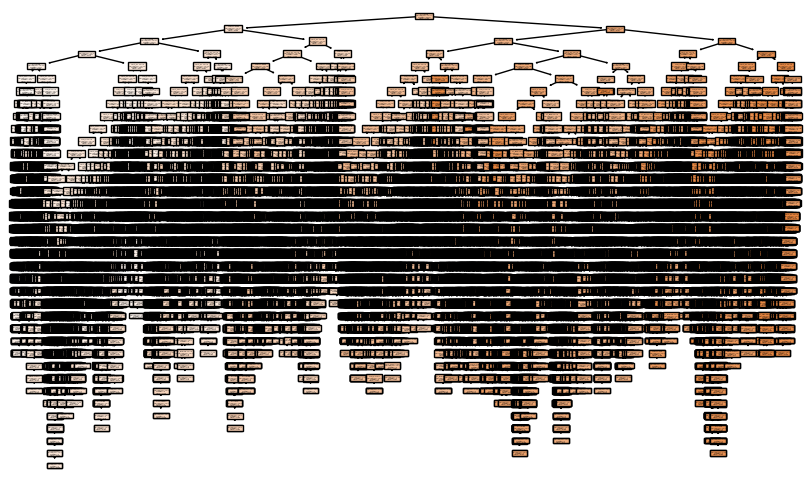

In [6]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [7]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.196152422706632

In [8]:
print(regressor.tree_.max_depth)

36


In [9]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [10]:
y_pred_test_dt

array([8.871, 6.861, 6.501, ..., 7.354, 6.978, 7.752])

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,9.031257e-02,1.751369e-02,1.323393e-01,0.982851,test,Decission Tree I
1,1.888106e-17,2.135219e-32,1.461239e-16,1.000000,train,Decission Tree I


In [13]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
%time
gs.fit(X_train, y_train)

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 36 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.232, test=-0.229) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.479, test=-0.481) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.388, test=-0.396) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.456, test=-0.460) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.848, test=-0.846) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.278, test=-0.284) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.768, test=-0.770) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=1

[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.221, test=-0.216) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.141, test=-0.148) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.950, test=-0.982) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.112, test=-0.113) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.187, test=-0.187) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.350, test=-0.352) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.296, test=-0.302) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.157, test=-0.157) total time=   0.0s
[CV 10/10] END max_depth=4, max_features

[CV 2/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.069, test=-0.070) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.134, test=-0.142) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.070, test=-0.068) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.115, test=-0.115) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.089, test=-0.088) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.066, test=-0.068) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.083, test=-0.084) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.092, test=-0.089) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=6, min_

[CV 7/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.097, test=-0.100) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.591, test=-0.596) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.171, test=-0.172) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.784, test=-0.763) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.122, test=-0.122) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.720, test=-0.719) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.117, test=-0.119) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=3, min_samples_split=10;, score=(train=-0.196, test=-0.201) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=3, 

[CV 2/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.150, test=-0.148) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.063, test=-0.064) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.114, test=-0.117) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.067, test=-0.068) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.096, test=-0.100) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.131, test=-0.136) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.067, test=-0.067) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.750, test=-0.728) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=5, min_

[CV 6/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.603, test=-0.593) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.224, test=-0.228) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.694, test=-0.689) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.286, test=-0.289) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.139, test=-0.136) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.137, test=-0.138) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.251, test=-0.256) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.250, test=-0.257) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=2,

[CV 5/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.132, test=-0.136) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.163, test=-0.158) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.079, test=-0.084) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.055, test=-0.057) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.054, test=-0.055) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_samples_split=10;, score=(train=-0.100, test=-0.100) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.064, test=-0.067) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.061, test=-0.067) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=4, min_

[CV 6/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.055, test=-0.058) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.056, test=-0.055) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=50;, score=(train=-0.051, test=-0.055) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.053, test=-0.054) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.047, test=-0.049) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.055, test=-0.056) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=6, m

[CV 6/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.260, test=-0.275) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.091, test=-0.090) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.172, test=-0.169) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.061, test=-0.063) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=3, min_samples_split=10;, score=(train=-0.113, test=-0.118) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.482, test=-0.471) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.063, test=-0.069) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.093, test=-0.094) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=3, min_

[CV 3/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.063, test=-0.065) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.056) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.054, test=-0.054) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.051, test=-0.053) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.054, test=-0.057) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.116, test=-0.113) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.044, test=-0.047) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.054, test=-0.057) total time=   0.0s
[CV 1/10] END max_depth=7, max_features

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

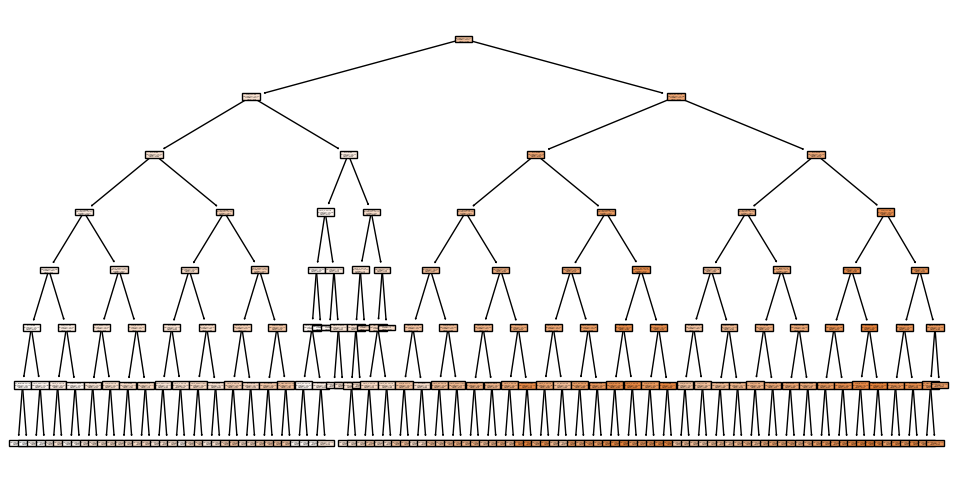

In [16]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


### Prediction

In [17]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [18]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [19]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.168240,0.048507,0.220243,0.952502,test,Decision tree II
1,0.167716,0.048802,0.220913,0.952941,train,Decision tree II


## Test

In [23]:
df1 = pd.read_csv("/Users/davidfernandez/Desktop/Projects/Machine learning project/Kaggle_competition/Data/Third combination/reality2.csv", index_col = 0)


In [24]:
df1

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.32,60.500000,58.0,4.43,4.49,2.70,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,1.24,62.900000,60.0,6.80,6.74,4.26,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,1.66,62.000000,59.0,7.55,7.60,4.70,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.75,60.600000,56.0,5.94,5.90,3.59,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1.50,61.793206,55.0,7.26,7.15,4.67,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,59.600000,60.0,6.74,6.70,4.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,13481,0.90,62.100000,60.0,6.14,6.20,3.83,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13482,13482,0.30,62.100000,53.3,4.30,4.32,2.68,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13483,13483,1.25,59.600000,59.0,7.01,7.09,4.20,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [25]:
X_reality_submision = best_tree.predict(df1)
X_reality_submision

array([6.26977846, 8.68656863, 9.16346667, ..., 6.55740482, 8.58027419,
       7.7615297 ])

In [26]:
submision1 = pd.DataFrame(X_reality_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.269778
1,1,8.686569
2,2,9.163467
3,3,8.059856
4,4,8.620321
...,...,...
13480,13480,8.492222
13481,13481,8.308021
13482,13482,6.557405
13483,13483,8.580274


In [28]:
submision1.to_csv("submission2_david2.csv", index=False)